In [0]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

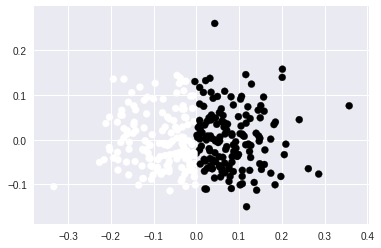

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99

Correct: 183 
Total: 303 
Accuracy 60.4


In [48]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))
result = pd.crosstab(y_pred, y)
correct = np.sum(np.diagonal(result))
total = np.sum(result.values)
accuracy = ((round(correct/total*100, 2)))
print('\nCorrect:', correct,'\nTotal:', total, '\nAccuracy', accuracy)

In [49]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))
result = pd.crosstab(predict_mini, y_pred)
correct = np.sum(np.diagonal(result))
total = np.sum(result.values)
accuracy = ((round(correct/total*100, 2)))
print('\nCorrect:', correct,'\nTotal:', total, '\nAccuracy', accuracy)

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0        2  138
1      147   16

Correct: 18 
Total: 303 
Accuracy 5.94


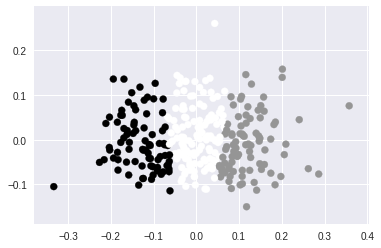

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      65  70
1      25  61
2      49  33


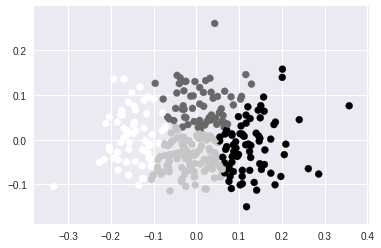

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56


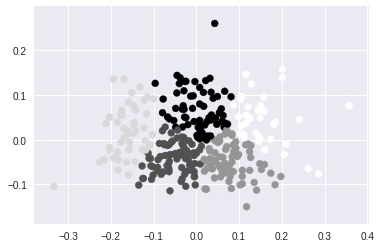

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28


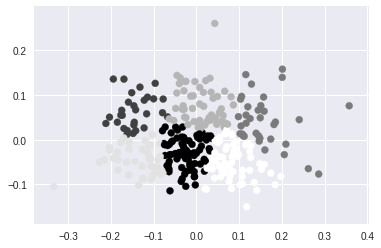

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44


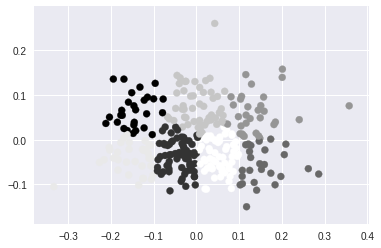

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      14  48
1      19  15
2      34  20
3      16  15
4       3  23
5      31  37
6      22   6


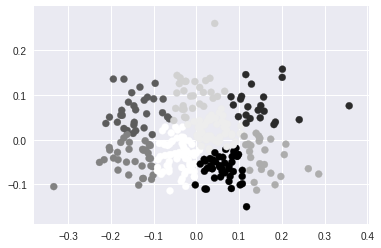

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      32  35
1      22  29
2      17  12
3       5  20
4      19  15
5      24   6
6      12  10
7       8  37


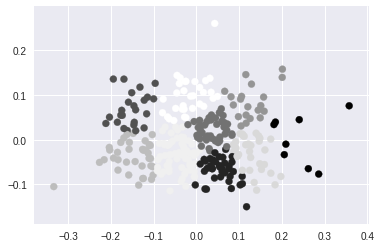

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      19  13
1      32  35
2       8  24
3      20  16
4      13   7
5      20  25
6      20   4
7       6  33
8       1   7


In [50]:
#create loop to iterate through different K values 
for x in range(3, 10):
  # Calculate predicted values.
  y_pred = KMeans(n_clusters=x, random_state=42).fit_predict(X_pca)

  # Plot the solution.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
  plt.show()

  # Check the solution against the data.
  print('Comparing k-means clusters against the data:')
  print(pd.crosstab(y_pred, y))

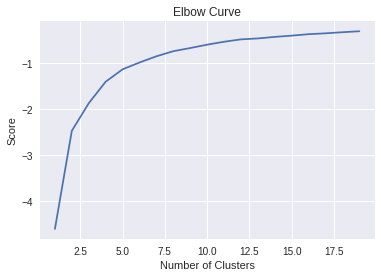

In [51]:
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i,random_state=42) for i in Nc]

kmeans

score = [kmeans[i].fit(X_pca).score(X_pca) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()